In [11]:
!pip install pandas scikit-learn

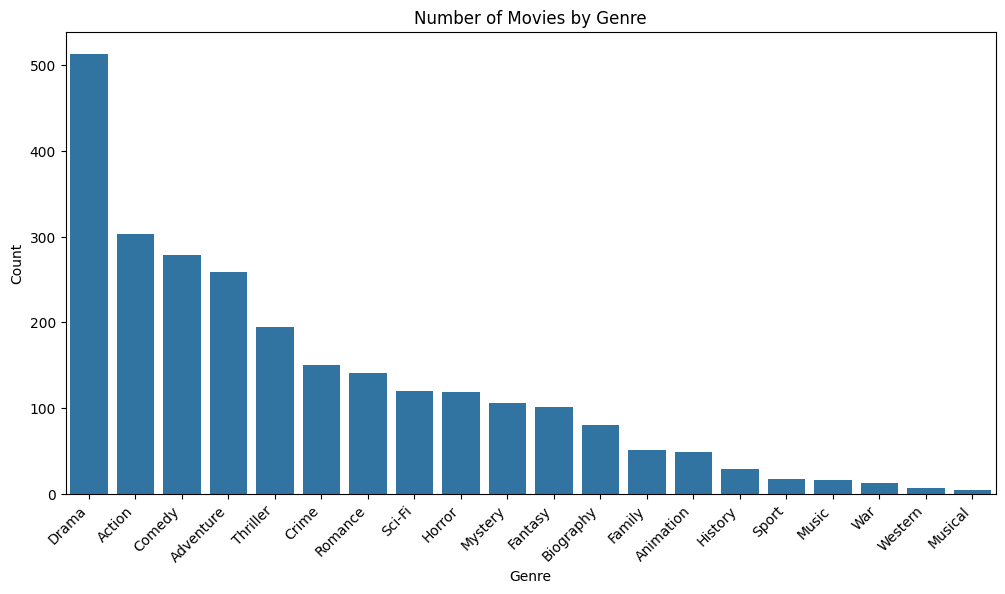

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Predicted Genre: [[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Accuracy: 0.017857142857142856
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.18      0.29        55
           1       0.57      0.08      0.14        49
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        12
           4       0.86      0.12      0.22        48
           5       1.00      0.04      0.07        26
           6       0.56      0.86      0.68        83
           7       0.00      0.00      0.00        12
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00        18
          14       0.60      0.14      0.22        22
          15       1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Predicted Genre: [[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Accuracy: 0.017857142857142856
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.22      0.34        55
           1       0.50      0.06      0.11        49
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        12
           4       0.86      0.12      0.22        48
           5       1.00      0.04      0.07        26
           6       0.55      0.86      0.67        83
           7       0.00      0.00      0.00        12
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         0
          13      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

#(1) 캐글 데이터셋(https://www.kaggle.com/datasets) 불러오기
df = pd.read_csv('imdb_movie_dataset.csv')

import seaborn as sns
import matplotlib.pyplot as plt

# 장르별 영화 개수 계산
genre_counts = df['Genre'].str.get_dummies(sep=',').sum().sort_values(ascending=False)

# (2) 시각화 확인 - 막대 그래프 생성
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Number of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# 데이터 전처리
df.dropna(inplace=True)  # 결측치가 있는 행 삭제

# NLTK 리소스 다운로드 (필요한 경우)
nltk.download('punkt_tab')

# 텍스트 전처리 함수
def preprocess_text(text):
    # 토큰화
    tokens = nltk.word_tokenize(text.lower())
    # 불용어 제거
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalnum()]
    # 표제어 추출
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# 'Description' 컬럼 전처리
df['Description'] = df['Description'].apply(preprocess_text)

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=5000)  # 특징 개수 제한
X = vectorizer.fit_transform(df['Description'])

# 범주형 데이터 처리 (One-Hot Encoding)
y = df['Genre'].str.get_dummies(sep=',')

#(4) 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #학습 데이터와 테스트 데이터로 분할

#(3) ML 모델 선정(랜덤 포레스트) 모델 학습
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

#(5) 학습 실행
rf_classifier.fit(X_train, y_train)

#(6) 새로운 데이터로 예측
new_description = ["This is a thrilling action movie with a touch of romance."]
new_description_vectorized = vectorizer.transform(new_description)
predicted_genre = rf_classifier.predict(new_description_vectorized)

print(f'Predicted Genre: {predicted_genre}')

# (6) 평가 결과 확인
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

# (7) 최적화 실행 및 학습 재실행

from sklearn.model_selection import GridSearchCV

# 튜닝할 하이퍼파라미터 범위 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# GridSearchCV 실행
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print(f'Best Hyperparameters: {grid_search.best_params_}')

# 최적 모델 저장
best_rf_classifier = grid_search.best_estimator_

# 최적 모델로 재학습
best_rf_classifier.fit(X_train, y_train)

# (8) 새로운 데이터로 예측
new_description = ["This is a thrilling action movie with a touch of romance."]
new_description_vectorized = vectorizer.transform(new_description)
predicted_genre = rf_classifier.predict(new_description_vectorized)

print(f'Predicted Genre: {predicted_genre}')

# (8) 평가 결과 확인
y_pred = best_rf_classifier.predict(X_test)  # 최적 모델로 예측
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

